In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1494.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1350.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1453.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1110.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1351.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1407.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1394.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1016.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1428.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1366.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1308.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1247.jpg
/kag

In [2]:
from tensorflow.keras.applications import VGG16

In [3]:
#VGG16 convolutional base 卷積基底
conv_base = VGG16(weights='imagenet', #初始化model的權重檢查點
                 include_top=False, #指神經網路頂部(輸出)有無包含密集連接的分類器
                                    #預設的密集連接分類器對應ImageNet的1000個類別，因此選擇false自訂兩個(貓、狗)類別的分類器
                 input_shape=(150,150,3)) #若不傳遞此參數，神經網路能處理任何shape的輸入張量

2022-08-18 17:53:20.241494: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


58900480/58889256 [==============================] - 0s 0us/step


In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
#快速特徵萃取(無法資料擴增)
#1.執行ImageDataGenerator產生器，將影像轉換為Numpy陣列及其標籤向量
#2.呼叫conv_base model的predict從影像中萃取特徵

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
base_dir = "../input/cats-and-dogs-small/cats_and_dogs_small"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [8]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) #VGG16最終特徵圖之shape
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #從批次影像中萃取特徵
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i += 1
        print(i, end=' ')#萃取需要較長的時間，印i出來檢視進度
        if i * batch_size >= sample_count: #當萃取樣本數超過設定的樣本數
            break
    
    return features, labels

In [9]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.


2022-08-18 17:53:21.766617: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [10]:
#將資料展平
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [11]:
#建立和訓練密集連接分類器
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers

In [12]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc']) 

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 13ms/step - loss: 0.5790 - acc: 0.7010 - val_loss: 0.4226 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 1s 11ms/step - loss: 0.4247 - acc: 0.8045 - val_loss: 0.3496 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 1s 11ms/step - loss: 0.3419 - acc: 0.8550 - val_loss: 0.3343 - val_acc: 0.8530
Epoch 4/30
100/100 [==============================] - 1s 11ms/step - loss: 0.3116 - acc: 0.8680 - val_loss: 0.2953 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2733 - acc: 0.8960 - val_loss: 0.2840 - val_acc: 0.8880
Epoch 6/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2732 - acc: 0.8895 - val_loss: 0.2735 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2403 - acc: 0.9060 - val_loss: 0.2640 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 1s 11ms/step - 

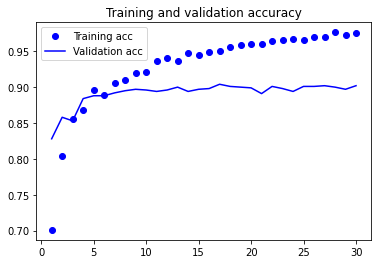

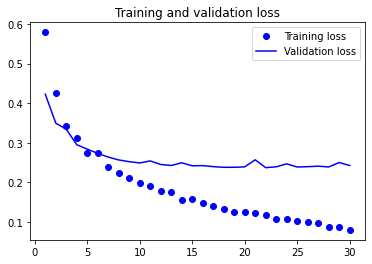

In [15]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
#資料擴增的特徵萃取
#可在訓練期間進行資料擴增
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16

In [17]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [18]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
#凍結卷積基底(convolutional base)神經網路
#訓練期間停止更新權重，防止convolutional base先前學習到的表示法在訓練期間被修改掉
print('This is the number of trainable weights before freezing the convolutional base:', len(model.trainable_weights))

conv_base.trainable = False #凍結權重

print('This is the number of trainable weights after freezing the convolutional base:', len(model.trainable_weights))
#只會訓練增加的兩個Dense層的權重，每層2個(主要權重矩陣和偏差向量)

This is the number of trainable weights before freezing the convolutional base: 30
This is the number of trainable weights after freezing the convolutional base: 4


In [21]:
#凍結的concolutional base及資料擴增訓練model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [22]:
#擴充訓練資料
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [25]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 294s 3s/step - loss: 0.5892 - acc: 0.7100 - val_loss: 0.4547 - val_acc: 0.8290
Epoch 2/30
100/100 [==============================] - 292s 3s/step - loss: 0.4877 - acc: 0.7970 - val_loss: 0.3695 - val_acc: 0.8660
Epoch 3/30
100/100 [==============================] - 292s 3s/step - loss: 0.4251 - acc: 0.8035 - val_loss: 0.3370 - val_acc: 0.8580
Epoch 4/30
100/100 [==============================] - 293s 3s/step - loss: 0.4016 - acc: 0.8270 - val_loss: 0.3280 - val_acc: 0.8570
Epoch 5/30
100/100 [==============================] - 293s 3s/step - loss: 0.3932 - acc: 0.8220 - val_loss: 0.2951 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 293s 3s/step - loss: 0.3595 - acc: 0.8510 - val_loss: 0.2827 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 294s 3s/step - loss: 0.3616 - acc: 0.8400 - val_loss: 0.2719 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 292s 3s/step - 

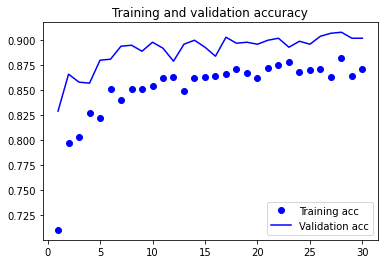

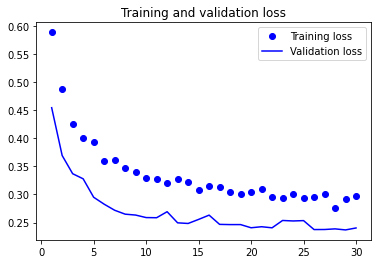

In [26]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
#微調
#解凍卷積基底的某些層與密集層進行聯合訓練
#1. 在以訓練過的基礎神經網路(卷積基底)，增加自定義的神經網路
#2. 凍結卷積基底
#3. 訓練1.增加的神經網路
#以上三步驟與資料擴增的特徵萃取相同
#4. 解凍卷積基底的某幾層
#5. 共同訓練解凍的這幾層與分類器

In [ ]:
#凍結至指定層
conv_base.trainable = True #先設定所有層為可訓練

set_trainable = False #是否進行凍結的boolen變數
for layer in conv_base.layers:
    if layer.name == 'block5_conv1': #把block5_conv1之前的層都設定為不可訓練
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 340s 3s/step - loss: 0.5284 - acc: 0.7255 - val_loss: 0.3289 - val_acc: 0.8660
Epoch 2/100
100/100 [==============================] - 341s 3s/step - loss: 0.3787 - acc: 0.8280 - val_loss: 0.2662 - val_acc: 0.8840
Epoch 3/100
100/100 [==============================] - 339s 3s/step - loss: 0.3167 - acc: 0.8695 - val_loss: 0.2222 - val_acc: 0.9050
Epoch 4/100
100/100 [==============================] - 336s 3s/step - loss: 0.2872 - acc: 0.8740 - val_loss: 0.2166 - val_acc: 0.9090
Epoch 5/100
100/100 [==============================] - 335s 3s/step - loss: 0.2626 - acc: 0.8940 - val_loss: 0.2037 - val_acc: 0.9210
Epoch 6/100
100/100 [==============================] - 339s 3s/step - loss: 0.2650 - acc: 0.8905 - val_loss: 0.1959 - val_acc: 0.9180
Epoch 7/100
100/100 [==============================] - 336s 3s/step - loss: 0.2444 - acc: 0.9050 - val_loss: 0.1916 - val_acc: 0.9240
Epoch 8/100
100/100 [==============================] - 333s 3s/step - loss: 0.2277 - acc: 0.9105 - val_loss: 0.1811 - val_acc: 0.9220
Epoch 9/100
100/100 [==============================] - 336s 3s/step - loss: 0.2293 - acc: 0.9135 - val_loss: 0.1980 - val_acc: 0.9160
Epoch 10/100
100/100 [==============================] - 337s 3s/step - loss: 0.2116 - acc: 0.9135 - val_loss: 0.1817 - val_acc: 0.9250
Epoch 11/100
100/100 [==============================] - 333s 3s/step - loss: 0.1935 - acc: 0.9150 - val_loss: 0.1863 - val_acc: 0.9220
Epoch 12/100
100/100 [==============================] - 332s 3s/step - loss: 0.1943 - acc: 0.9225 - val_loss: 0.1742 - val_acc: 0.9300
Epoch 13/100
100/100 [==============================] - 332s 3s/step - loss: 0.1734 - acc: 0.9210 - val_loss: 0.1678 - val_acc: 0.9300
Epoch 14/100
100/100 [==============================] - 333s 3s/step - loss: 0.1591 - acc: 0.9360 - val_loss: 0.1853 - val_acc: 0.9260
Epoch 15/100
100/100 [==============================] - 334s 3s/step - loss: 0.1588 - acc: 0.9440 - val_loss: 0.1916 - val_acc: 0.9160
Epoch 16/100
100/100 [==============================] - 336s 3s/step - loss: 0.1622 - acc: 0.9325 - val_loss: 0.1762 - val_acc: 0.9280
Epoch 17/100
100/100 [==============================] - 333s 3s/step - loss: 0.1642 - acc: 0.9330 - val_loss: 0.1843 - val_acc: 0.9220
Epoch 18/100
100/100 [==============================] - 335s 3s/step - loss: 0.1501 - acc: 0.9330 - val_loss: 0.1912 - val_acc: 0.9210
Epoch 19/100
100/100 [==============================] - 334s 3s/step - loss: 0.1316 - acc: 0.9490 - val_loss: 0.1764 - val_acc: 0.9250
Epoch 20/100
100/100 [==============================] - 333s 3s/step - loss: 0.1360 - acc: 0.9455 - val_loss: 0.1741 - val_acc: 0.9320
Epoch 21/100
100/100 [==============================] - 334s 3s/step - loss: 0.1435 - acc: 0.9445 - val_loss: 0.2060 - val_acc: 0.9210
Epoch 22/100
100/100 [==============================] - 333s 3s/step - loss: 0.1233 - acc: 0.9500 - val_loss: 0.1758 - val_acc: 0.9320
Epoch 23/100
100/100 [==============================] - 337s 3s/step - loss: 0.1185 - acc: 0.9520 - val_loss: 0.1539 - val_acc: 0.9370
Epoch 24/100
100/100 [==============================] - 337s 3s/step - loss: 0.1161 - acc: 0.9510 - val_loss: 0.1549 - val_acc: 0.9360
Epoch 25/100
100/100 [==============================] - 337s 3s/step - loss: 0.1055 - acc: 0.9560 - val_loss: 0.2568 - val_acc: 0.9100
Epoch 26/100
100/100 [==============================] - 337s 3s/step - loss: 0.1057 - acc: 0.9570 - val_loss: 0.1800 - val_acc: 0.9300
Epoch 27/100
100/100 [==============================] - 334s 3s/step - loss: 0.1108 - acc: 0.9540 - val_loss: 0.1726 - val_acc: 0.9350
Epoch 28/100
100/100 [==============================] - 334s 3s/step - loss: 0.0996 - acc: 0.9645 - val_loss: 0.2350 - val_acc: 0.9160
Epoch 29/100
100/100 [==============================] - 335s 3s/step - loss: 0.0979 - acc: 0.9630 - val_loss: 0.1685 - val_acc: 0.9380
Epoch 30/100
100/100 [==============================] - 338s 3s/step - loss: 0.0941 - acc: 0.9620 - val_loss: 0.1900 - val_acc: 0.9300
Epoch 31/100
100/100 [==============================] - 334s 3s/step - loss: 0.0895 - acc: 0.9640 - val_loss: 0.1982 - val_acc: 0.9310
Epoch 32/100
100/100 [==============================] - 337s 3s/step - loss: 0.0969 - acc: 0.9620 - val_loss: 0.1728 - val_acc: 0.9370
Epoch 33/100
100/100 [==============================] - 336s 3s/step - loss: 0.0885 - acc: 0.9695 - val_loss: 0.1702 - val_acc: 0.9400
Epoch 34/100
100/100 [==============================] - 378s 4s/step - loss: 0.0908 - acc: 0.9625 - val_loss: 0.1614 - val_acc: 0.9390
Epoch 35/100
100/100 [==============================] - 334s 3s/step - loss: 0.0824 - acc: 0.9675 - val_loss: 0.1622 - val_acc: 0.9430
Epoch 36/100
100/100 [==============================] - 334s 3s/step - loss: 0.0752 - acc: 0.9735 - val_loss: 0.1682 - val_acc: 0.9340
Epoch 37/100
100/100 [==============================] - 335s 3s/step - loss: 0.0823 - acc: 0.9665 - val_loss: 0.1858 - val_acc: 0.9300
Epoch 38/100
100/100 [==============================] - 336s 3s/step - loss: 0.0862 - acc: 0.9695 - val_loss: 0.2195 - val_acc: 0.9300
Epoch 39/100
100/100 [==============================] - 334s 3s/step - loss: 0.0750 - acc: 0.9735 - val_loss: 0.1765 - val_acc: 0.9310
Epoch 40/100
100/100 [==============================] - 335s 3s/step - loss: 0.0710 - acc: 0.9730 - val_loss: 0.2144 - val_acc: 0.9270
Epoch 41/100
100/100 [==============================] - 335s 3s/step - loss: 0.0725 - acc: 0.9710 - val_loss: 0.2270 - val_acc: 0.9270
Epoch 42/100
100/100 [==============================] - 333s 3s/step - loss: 0.0710 - acc: 0.9730 - val_loss: 0.3473 - val_acc: 0.9020
Epoch 43/100
100/100 [==============================] - 333s 3s/step - loss: 0.0635 - acc: 0.9800 - val_loss: 0.2977 - val_acc: 0.9150
Epoch 44/100
100/100 [==============================] - 335s 3s/step - loss: 0.0688 - acc: 0.9745 - val_loss: 0.2052 - val_acc: 0.9320
Epoch 45/100
100/100 [==============================] - 336s 3s/step - loss: 0.0575 - acc: 0.9815 - val_loss: 0.1687 - val_acc: 0.9350
Epoch 46/100
100/100 [==============================] - 334s 3s/step - loss: 0.0464 - acc: 0.9835 - val_loss: 0.2462 - val_acc: 0.9210
Epoch 47/100
100/100 [==============================] - 334s 3s/step - loss: 0.0673 - acc: 0.9725 - val_loss: 0.1667 - val_acc: 0.9390
Epoch 48/100
100/100 [==============================] - 336s 3s/step - loss: 0.0568 - acc: 0.9790 - val_loss: 0.2162 - val_acc: 0.9320
Epoch 49/100
100/100 [==============================] - 335s 3s/step - loss: 0.0615 - acc: 0.9805 - val_loss: 0.1777 - val_acc: 0.9340
Epoch 50/100
100/100 [==============================] - 336s 3s/step - loss: 0.0548 - acc: 0.9810 - val_loss: 0.2171 - val_acc: 0.9300
Epoch 51/100
100/100 [==============================] - 341s 3s/step - loss: 0.0557 - acc: 0.9800 - val_loss: 0.1989 - val_acc: 0.9360
Epoch 52/100
100/100 [==============================] - 344s 3s/step - loss: 0.0537 - acc: 0.9785 - val_loss: 0.2100 - val_acc: 0.9370
Epoch 53/100
100/100 [==============================] - 344s 3s/step - loss: 0.0422 - acc: 0.9805 - val_loss: 0.3066 - val_acc: 0.9200
Epoch 54/100
100/100 [==============================] - 338s 3s/step - loss: 0.0583 - acc: 0.9770 - val_loss: 0.2161 - val_acc: 0.9320
Epoch 55/100
100/100 [==============================] - 337s 3s/step - loss: 0.0530 - acc: 0.9830 - val_loss: 0.1861 - val_acc: 0.9400
Epoch 56/100
100/100 [==============================] - 338s 3s/step - loss: 0.0431 - acc: 0.9835 - val_loss: 0.2730 - val_acc: 0.9260
Epoch 57/100
100/100 [==============================] - 341s 3s/step - loss: 0.0433 - acc: 0.9850 - val_loss: 0.2049 - val_acc: 0.9370
Epoch 58/100
100/100 [==============================] - 341s 3s/step - loss: 0.0486 - acc: 0.9815 - val_loss: 0.2123 - val_acc: 0.9340
Epoch 59/100
100/100 [==============================] - 336s 3s/step - loss: 0.0493 - acc: 0.9825 - val_loss: 0.3786 - val_acc: 0.9100
Epoch 60/100
100/100 [==============================] - 338s 3s/step - loss: 0.0453 - acc: 0.9835 - val_loss: 0.3280 - val_acc: 0.9170
Epoch 61/100
100/100 [==============================] - 338s 3s/step - loss: 0.0423 - acc: 0.9860 - val_loss: 0.2018 - val_acc: 0.9360
Epoch 62/100
100/100 [==============================] - 336s 3s/step - loss: 0.0432 - acc: 0.9795 - val_loss: 0.2149 - val_acc: 0.9420
Epoch 63/100
100/100 [==============================] - 333s 3s/step - loss: 0.0378 - acc: 0.9850 - val_loss: 0.2166 - val_acc: 0.9330
Epoch 64/100
100/100 [==============================] - 334s 3s/step - loss: 0.0411 - acc: 0.9850 - val_loss: 0.2312 - val_acc: 0.9330
Epoch 65/100
100/100 [==============================] - 335s 3s/step - loss: 0.0526 - acc: 0.9770 - val_loss: 0.2262 - val_acc: 0.9320
Epoch 66/100
100/100 [==============================] - 338s 3s/step - loss: 0.0463 - acc: 0.9845 - val_loss: 0.3048 - val_acc: 0.9220
Epoch 67/100
100/100 [==============================] - 334s 3s/step - loss: 0.0291 - acc: 0.9915 - val_loss: 0.2233 - val_acc: 0.9340
Epoch 68/100
100/100 [==============================] - 335s 3s/step - loss: 0.0353 - acc: 0.9860 - val_loss: 0.1921 - val_acc: 0.9440
Epoch 69/100
100/100 [==============================] - 333s 3s/step - loss: 0.0229 - acc: 0.9905 - val_loss: 0.2940 - val_acc: 0.9300
Epoch 70/100
100/100 [==============================] - 335s 3s/step - loss: 0.0393 - acc: 0.9820 - val_loss: 0.2379 - val_acc: 0.9310
Epoch 71/100
100/100 [==============================] - 334s 3s/step - loss: 0.0295 - acc: 0.9885 - val_loss: 0.2201 - val_acc: 0.9420
Epoch 72/100
100/100 [==============================] - 332s 3s/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.3438 - val_acc: 0.9230
Epoch 73/100
100/100 [==============================] - 333s 3s/step - loss: 0.0435 - acc: 0.9845 - val_loss: 0.2405 - val_acc: 0.9330
Epoch 74/100
100/100 [==============================] - 334s 3s/step - loss: 0.0352 - acc: 0.9895 - val_loss: 0.3925 - val_acc: 0.9180
Epoch 75/100
100/100 [==============================] - 335s 3s/step - loss: 0.0356 - acc: 0.9865 - val_loss: 0.2845 - val_acc: 0.9340
Epoch 76/100
100/100 [==============================] - 334s 3s/step - loss: 0.0331 - acc: 0.9885 - val_loss: 0.2348 - val_acc: 0.9340
Epoch 77/100
100/100 [==============================] - 337s 3s/step - loss: 0.0309 - acc: 0.9900 - val_loss: 0.2356 - val_acc: 0.9330
Epoch 78/100
100/100 [==============================] - 347s 3s/step - loss: 0.0250 - acc: 0.9915 - val_loss: 0.2320 - val_acc: 0.9390
Epoch 79/100
100/100 [==============================] - 339s 3s/step - loss: 0.0319 - acc: 0.9890 - val_loss: 0.2249 - val_acc: 0.9430
Epoch 80/100
100/100 [==============================] - 339s 3s/step - loss: 0.0482 - acc: 0.9835 - val_loss: 0.2572 - val_acc: 0.9350
Epoch 81/100
100/100 [==============================] - 342s 3s/step - loss: 0.0318 - acc: 0.9895 - val_loss: 0.2242 - val_acc: 0.9400
Epoch 82/100
100/100 [==============================] - 344s 3s/step - loss: 0.0246 - acc: 0.9900 - val_loss: 0.3283 - val_acc: 0.9290
Epoch 83/100
100/100 [==============================] - 346s 3s/step - loss: 0.0289 - acc: 0.9900 - val_loss: 0.2158 - val_acc: 0.9350
Epoch 84/100
100/100 [==============================] - 343s 3s/step - loss: 0.0215 - acc: 0.9905 - val_loss: 0.3488 - val_acc: 0.9270
Epoch 85/100
100/100 [==============================] - 342s 3s/step - loss: 0.0430 - acc: 0.9875 - val_loss: 0.2435 - val_acc: 0.9390
Epoch 86/100
100/100 [==============================] - 343s 3s/step - loss: 0.0264 - acc: 0.9920 - val_loss: 0.2518 - val_acc: 0.9350
Epoch 87/100
100/100 [==============================] - 348s 3s/step - loss: 0.0295 - acc: 0.9890 - val_loss: 0.2533 - val_acc: 0.9350
Epoch 88/100
100/100 [==============================] - 342s 3s/step - loss: 0.0280 - acc: 0.9895 - val_loss: 0.2367 - val_acc: 0.9410
Epoch 89/100
100/100 [==============================] - 350s 4s/step - loss: 0.0332 - acc: 0.9870 - val_loss: 0.2490 - val_acc: 0.9370
Epoch 90/100
100/100 [==============================] - 347s 3s/step - loss: 0.0249 - acc: 0.9910 - val_loss: 0.3008 - val_acc: 0.9290
Epoch 91/100
100/100 [==============================] - 345s 3s/step - loss: 0.0298 - acc: 0.9905 - val_loss: 0.2328 - val_acc: 0.9350
Epoch 92/100
100/100 [==============================] - 342s 3s/step - loss: 0.0272 - acc: 0.9890 - val_loss: 0.2390 - val_acc: 0.9410
Epoch 93/100
100/100 [==============================] - 345s 3s/step - loss: 0.0315 - acc: 0.9880 - val_loss: 0.2336 - val_acc: 0.9380
Epoch 94/100
100/100 [==============================] - 346s 3s/step - loss: 0.0210 - acc: 0.9905 - val_loss: 0.2360 - val_acc: 0.9340
Epoch 95/100
100/100 [==============================] - 346s 3s/step - loss: 0.0227 - acc: 0.9915 - val_loss: 0.4792 - val_acc: 0.9160
Epoch 96/100
100/100 [==============================] - 338s 3s/step - loss: 0.0154 - acc: 0.9960 - val_loss: 0.2666 - val_acc: 0.9380
Epoch 97/100
100/100 [==============================] - 335s 3s/step - loss: 0.0289 - acc: 0.9890 - val_loss: 0.2725 - val_acc: 0.9410
Epoch 98/100
100/100 [==============================] - 336s 3s/step - loss: 0.0372 - acc: 0.9875 - val_loss: 0.4928 - val_acc: 0.9130
Epoch 99/100
100/100 [==============================] - 334s 3s/step - loss: 0.0245 - acc: 0.9920 - val_loss: 0.2254 - val_acc: 0.9470
Epoch 100/100
100/100 [==============================] - 335s 3s/step - loss: 0.0193 - acc: 0.9920 - val_loss: 0.5383 - val_acc: 0.9100

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#繪製平滑曲線
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

In [ ]:
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#使用測試資料評量微調後的model
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test_acc:', test_acc)

Found 1000 images belonging to 2 classes.
test_acc: 0.9070000052452087

In [ ]:
model.save("cats_and_dogs_small_modify.h5")